# Introduction

How can machine learning be applied to small businesses? Among some business owners, there is a perception that "big data" applications and practices can only be used by "big companies" like Amazon, Walmart, Uber, and Google that are generating oceans of data per day. While this may be true for some use cases, and few data scientists would turn down the opportunity to train their models with more data, a number of machine learning algorithms can actually perform quite well on smaller data sets that could be realistically produced by small to medium sized companies. 

Let's take the humble MNIST data set for example. The MNIST data set is a collection of 70,000 handwritten images primarily used as sandbox for data scientists to understand more about the different approaches to classification and image processing. These 70,000 data points are sufficient to train a working classification model. Specifically, a model that can often perform well on smaller data sets is the SVM, support vector machines model. 

The overall approach will be to generate 10 binary SVM classifiers where each one will classify individual digits individually. For example, one SVM classifier will determine if an image is a "9" or not. Both the MNIST data set and the SVM algorithm are sourced from the sklearn library published by Google. The SVM model generally had an accuracy of 90% or greater and with a precision and recall generally 75% or greater.


# Problem Statement

The handwritten digits of the MNIST dataset are generally identifiable by a human, but how would a computer be able to differentiate between the different images? Well, each image is a collection of 28 x 28 pixels, so one approach is to break down the images into a matrix where each pixel is given a value of 0 to 255 where 0 is completely white and 255 is completely black. From there the SVM models can interact with the data. Keeping that in mind, the overall workflow for this demonstration is as follows:

1. Import MNIST dataset from sklearn
2. Build out 10 SVM models to classify each individual digit type
3. Optimize each model via gridsearch of hyperparameters
4. Report and summarize results

As stated, the SVM model will be used to classify the dataset. The SVM model divides the data linearly into two classes by determining a decision boundary that maximizes the margin between the boundary and the support vectors. The support vectors are the data points in both classes that are the closest to the hyperplane. An example of this is shown below:


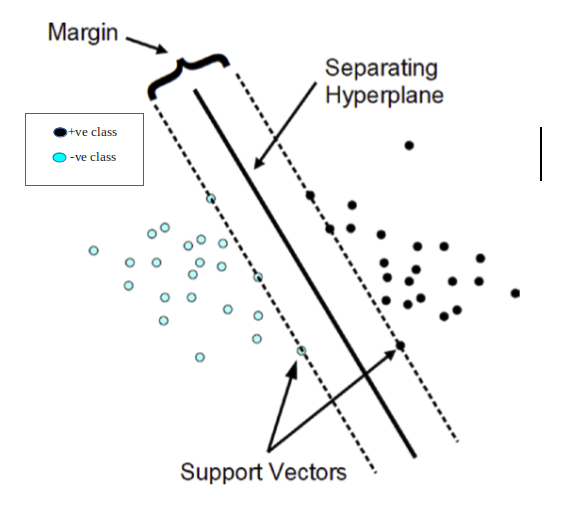

The hyperplane equation can be described numerically with the following equation: 

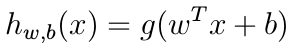 

Where W is the vector parameters, b is the bias, and x is input vector(s). SVM is not limited to one dimensional datasets and there can be multiple input vectors for x. 

# Experimental Evaluation

Since SVM can only split data sets into two categories, in order to use SVM on a data set with multiple classification outputs there needs to a be a SVM model for each individual digit. Collections of binary classifiers are more complicated to evaluate than single binary classifiers, but the metrics are the same. Accuracy, precision, and recall are still used and confusion matrixes are still evaluated to provide additional context to the models. Accuracy is the total number of correct predictions over the total number of predictions. However, this metric needs to be understood in the greater context of how many false positives and how many false negatives were observed? This is where precision and recall are utilized. Precision describes how often a model incorrectly classified something as positive, or in this case a specific digit. While recall describes how often a model incorrectly classified something as negative, or in this case not a specific digit. The equations for precision and recall are shown below.

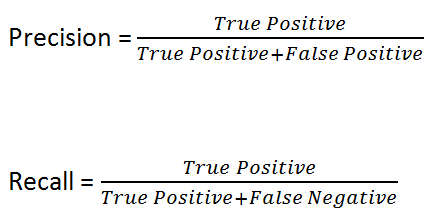

A confusion matrix is a breakdown of the precision and recall in matrix form. The top row depicts the true positives versus the false positives, and the bottom row depicts the false negative versus the true negatives. An image of a confusion matrix is shown below: 

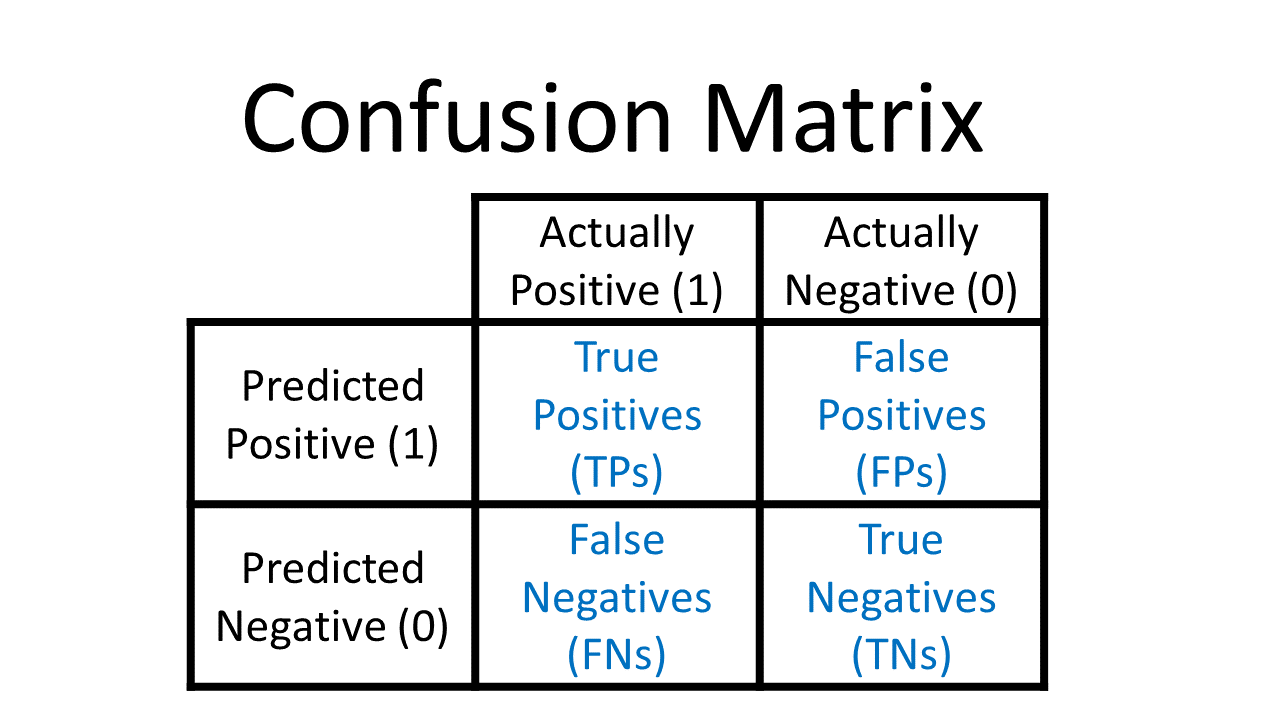

Where collections of multiple binary classifiers become more complex is that the overall collection should be evaluated to assess overall performance, but also each individual classifier should be evaluated to determine if there are any gaps in the model. For example, it is possible that the model classifying the "8" will result in more false positives than a model that classifies a "4" and should be noted when reporting the model performance.

As stated, the inputs for this model will be brought in from sklearn, more specifically sklearn sources the dataset from OpenML.org and created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges. OpenML is a free open-source project committed to furthering the education of machine learning and peer reviewed by the tech community, and therefore a reliable source of information. The inputs for the project are matrixes for each handwritten image that gives a value of 0 to 255 for each pixel that makes up the image. The outputs for this model will be the classification of each digit. 

# Data Pre-Processing 

Since the data was already processed from images to numerical matrices, there is limited data pre-processing required. But the typical machine learning organization steps will still be conducted. An outline of data pre-processing steps is listed below.

1. Read in and extract the data from OpenML.org via sklearn
2. Split the data into training, validations, and test sets
3. Visually inspect the dataset to gain insight to the data distributions
4. Split the dataset into 10 customized data sets that labels each individual digit

It is observed that the training data does not have an equal distribution of each individual category, and as a result, the training and validation data will need to be stratified to avoid bias. Stratification is essentially splitting the data so that both the training and validation sets reflect the distributions of the entire populations. There is a chance that randomly sampling data from the training data to split into the validation data will not correctly reflect the overall populations, to prevent this the data will be split using stratification. 

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X = mnist.data

y = mnist.target

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Per the dataset documentation. The data is actually already segmented into testing and training groups. The test data starts at index 60,000 on-ward. However, the training data needs to still be split into a training and validation set. 

In [17]:
X_train_org, X_test = X[:60000], X[60000:]
y_train_org, y_test = y[:60000], y[60000:]

For multi-output classification datasets, the datasets may be weighted unevenly. To see if that is the case, a histogram can be used to visually inspect the data.

(array([5421., 5923., 5842., 6742., 5949., 5958., 6131., 5918., 6265.,
        5851.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

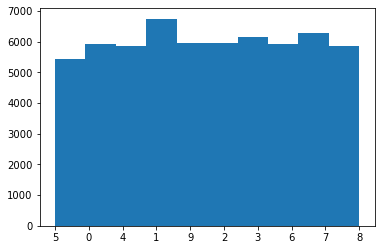

In [18]:
plt.hist(y_train_org)

As discussed above the data set is slightly imbalanced. As one can see there appear to be more "1"s that others, to make sure the training and validation sets are accurate, a straification will be used. The stratification is based upon the distribution of the training dataset.  

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_org, y_train_org, test_size=.05, stratify = y_train_org, random_state = 42)

SVM is a computation heavy algorithm, and can take significant time to process larger data sets, as a result, the validation data sets were created to be especially small to allow for reasonable computation times. 

The data needs to be reorganized to be useable with 10 binary classifiers. To change the multiclass dataset into data that can be used for binary classifiers, the data will be changed into 10 binary data sets where each specific digit is replaced with a "1" if it is the specific digit. For example, a "5" dataset will be used where every "5" will be replaced with a "1" and every other value is replaced with a "0". 

In [20]:
y_train_1, y_val_1, y_test_1 = (y_train == "1"), (y_val == '1'), (y_test == '1')
y_train_2, y_val_2, y_test_2 = (y_train == "2"), (y_val == '2'), (y_test == '2')
y_train_3, y_val_3, y_test_3 = (y_train == "3"), (y_val == '3'), (y_test == '3')
y_train_4, y_val_4, y_test_4 = (y_train == "4"), (y_val == '4'), (y_test == '4')
y_train_5, y_val_5, y_test_5 = (y_train == "5"), (y_val == '5'), (y_test == '5')
y_train_6, y_val_6, y_test_6 = (y_train == "6"), (y_val == '6'), (y_test == '6')
y_train_7, y_val_7, y_test_7 = (y_train == "7"), (y_val == '7'), (y_test == '7')
y_train_8, y_val_8, y_test_8 = (y_train == "8"), (y_val == '8'), (y_test == '8')
y_train_9, y_val_9, y_test_9 = (y_train == "9"), (y_val == '9'), (y_test == '9')
y_train_0, y_val_0, y_test_0 = (y_train == "0"), (y_val == '0'), (y_test == '0')

In [21]:
y_train_1_org = (y_train_org == "1")
y_train_2_org = (y_train_org == "2")
y_train_3_org = (y_train_org == "3")
y_train_4_org = (y_train_org == "4")
y_train_5_org = (y_train_org == "5")
y_train_6_org = (y_train_org == "6")
y_train_7_org = (y_train_org == "7")
y_train_8_org = (y_train_org == "8")
y_train_9_org = (y_train_org == "9")
y_train_0_org = (y_train_org == "0")

For many machine learning models, it is common to scale the inputs. This is because a number of machine learning models are sensitive to the different scales of the inputs. However, this model does not require scaling because all the inputs are on the same scale of 0-255, therefore scaling is not required. 

# Model Performance 

Using the default hyperparameters in sklearn for the SVM classifier, the SVM model performed well. Generally the accuracy was at least 90% and the recall and precision were generally at least 75% for most digits on the test set. There were a couple of gaps with specific digits having lower performance, which is likely due to the differences in handwritting styles. 

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [11]:
digit_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
y_val_list = [y_val_0, y_val_1, y_val_2, y_val_3, y_val_4, y_val_5, y_val_6, y_val_7, y_val_8, y_val_9]
y_train_list = [y_train_0, y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8, y_train_9]

In [12]:
def mnist_svm(digit, x_training_set, x_validation_set, y_training_set, y_validation_set):

    # define model
    model = LinearSVC(max_iter = 750, C = 1, random_state = 42)
    # train model
    model.fit(x_training_set, y_training_set)
    # make predictions on training set
    y_pred = model.predict(x_training_set)
    score = cross_val_score(model, x_training_set, y_training_set, cv=3)
    #evaluate predictions
    precision = precision_score(y_pred = y_pred, y_true = y_training_set)
    recall = recall_score(y_pred = y_pred, y_true = y_training_set)
    print(f'SVM {digit} training accuracy: {round(score.mean(), 2)}')
    print(f'SVM {digit} training precision: {round(precision, 2)}')
    print(f'SVM {digit} training recall: {round(recall, 2)}')

    conf_matr_train = confusion_matrix(y_training_set, y_pred)
    print(conf_matr_train)
    
    # make predicitons on validation set
    y_pred = model.predict(x_validation_set)
    score = cross_val_score(model, x_validation_set, y_validation_set, cv=3)
    #evaluate predictions
    precision = precision_score(y_pred = y_pred, y_true = y_validation_set)
    recall = recall_score(y_pred = y_pred, y_true = y_validation_set)
    print(f'SVM {digit} validation accuracy: {round(score.mean(), 2)}')
    print(f'SVM {digit} validation precision: {round(precision, 2)}')
    print(f'SVM {digit} validation recall: {round(recall, 2)}')

    conf_matr_val = confusion_matrix(y_validation_set, y_pred)
    print(conf_matr_val)
    
    param_grid = {'C': [0.1, 1, 10, 100], 
                  'penalty': ['l2'],
                 'random_state':[42]} 
    # define grid search
    grid_search = GridSearchCV(model, param_grid, refit = True, n_jobs = -1, scoring = 'f1', cv=3, error_score=0)
    grid_result = grid_search.fit(x_validation_set, y_validation_set)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    return 

In [13]:
for i in range(len(digit_list)):
    mnist_svm(digit_list[i], X_train, X_val, y_train_list[i], y_val_list[i])

SVM 0 training accuracy: 0.99
SVM 0 training precision: 0.98
SVM 0 training recall: 0.85
[[51291    82]
 [  853  4774]]
SVM 0 validation accuracy: 0.98
SVM 0 validation precision: 0.95
SVM 0 validation recall: 0.81
[[2691   13]
 [  55  241]]
Best: 0.886646 using {'C': 0.1, 'penalty': 'l2', 'random_state': 42}
SVM 1 training accuracy: 0.99
SVM 1 training precision: 0.87
SVM 1 training recall: 0.99
[[49631   964]
 [   59  6346]]
SVM 1 validation accuracy: 0.98
SVM 1 validation precision: 0.87
SVM 1 validation recall: 0.98
[[2615   48]
 [   7  330]]
Best: 0.928631 using {'C': 0.1, 'penalty': 'l2', 'random_state': 42}
SVM 2 training accuracy: 0.96
SVM 2 training precision: 0.86
SVM 2 training recall: 0.85
[[50577   763]
 [  824  4836]]
SVM 2 validation accuracy: 0.96
SVM 2 validation precision: 0.85
SVM 2 validation recall: 0.86
[[2657   45]
 [  42  256]]
Best: 0.823587 using {'C': 0.1, 'penalty': 'l2', 'random_state': 42}
SVM 3 training accuracy: 0.96
SVM 3 training precision: 0.66
SVM 3 

Overall, the SVM seemed to classify the handwritten digits well. For the most part, the models produced an accuracy over 90% and a precision and recall that were both over 80% respectively, however there were a few numbers that had poorer results than others. "9", "8", "7", and "3" all saw lower metrics either for precision and/or recall. While the exact reasoning for these digits to have lower performance than others is not fully known, it likely stems from the differences in hand writing styles and the way that certain handwritten digits can appear to look like others if not written neatly. When the data is retrained on the training and validation data these metrics may improve due to the additional data. 

Now that the hyperparameters for each model have been determined, each model will be evaluated on the test set of data using the hyper parameters, but prior to testing the model will be retrained on a combination of the training and validation data. 

In [24]:
# train model for digit 0 
model = LinearSVC(C= 0.1, penalty= 'l2', random_state = 42)
model.fit(X_train_org, y_train_0_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_0, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_0)
recall = recall_score(y_pred = y_pred, y_true = y_test_0)
print(f'SVM 0 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 0 testing precision: {round(precision, 2)}')
print(f'SVM 0 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_0, y_pred)
print(conf_matr_test)

# train model for digit 1 
model = LinearSVC(C = 0.1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_1_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_1, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_1)
recall = recall_score(y_pred = y_pred, y_true = y_test_1)
print(f'SVM 1 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 1 testing precision: {round(precision, 2)}')
print(f'SVM 1 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_1, y_pred)
print(conf_matr_test)

# train model for digit 2 
model = LinearSVC(C = 0.1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_2_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_2, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_2)
recall = recall_score(y_pred = y_pred, y_true = y_test_2)
print(f'SVM 2 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 2 testing precision: {round(precision, 2)}')
print(f'SVM 2 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_2, y_pred)
print(conf_matr_test)

# train model for digit 3 
model = LinearSVC(C = 1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_3_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_3, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_3)
recall = recall_score(y_pred = y_pred, y_true = y_test_3)
print(f'SVM 3 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 3 testing precision: {round(precision, 2)}')
print(f'SVM 3 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_3, y_pred)
print(conf_matr_test)

# train model for digit 4
model = LinearSVC(C = 0.1, penalty= 'l2', random_state = 42)
model.fit(X_train_org, y_train_4_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_4, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_4)
recall = recall_score(y_pred = y_pred, y_true = y_test_4)
print(f'SVM 4 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 4 testing precision: {round(precision, 2)}')
print(f'SVM 4 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_4, y_pred)
print(conf_matr_test)

# train model for digit 5
model = LinearSVC(C =0.1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_5_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_5, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_5)
recall = recall_score(y_pred = y_pred, y_true = y_test_5)
print(f'SVM 5 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 5 testing precision: {round(precision, 2)}')
print(f'SVM 5 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_5, y_pred)
print(conf_matr_test)

# train model for digit 6
model = LinearSVC(C = 1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_6_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_6, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_6)
recall = recall_score(y_pred = y_pred, y_true = y_test_6)
print(f'SVM 6 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 6 testing precision: {round(precision, 2)}')
print(f'SVM 6 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_6, y_pred)
print(conf_matr_test)

# train model for digit 7
model = LinearSVC(C = 0.1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_7_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_7, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_7)
recall = recall_score(y_pred = y_pred, y_true = y_test_7)
print(f'SVM 7 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 7 testing precision: {round(precision, 2)}')
print(f'SVM 7 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_7, y_pred)
print(conf_matr_test)

# train model for digit 8
model = LinearSVC(C = 1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_8_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_8, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_8)
recall = recall_score(y_pred = y_pred, y_true = y_test_8)
print(f'SVM 8 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 8 testing precision: {round(precision, 2)}')
print(f'SVM 8 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_8, y_pred)
print(conf_matr_test)

# train model for digit 9
model = LinearSVC(C = 0.1, penalty = 'l2', random_state = 42)
model.fit(X_train_org, y_train_9_org)
# make predictions on training set
y_pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test_9, cv=3)
#evaluate predictions
precision = precision_score(y_pred = y_pred, y_true = y_test_9)
recall = recall_score(y_pred = y_pred, y_true = y_test_9)
print(f'SVM 9 testing accuracy: {round(score.mean(), 2)}')
print(f'SVM 9 testing precision: {round(precision, 2)}')
print(f'SVM 9 testing recall: {round(recall, 2)}')

conf_matr_test = confusion_matrix(y_test_9, y_pred)
print(conf_matr_test)

SVM 0 testing accuracy: 0.99
SVM 0 testing precision: 0.97
SVM 0 testing recall: 0.91
[[8995   25]
 [  92  888]]
SVM 1 testing accuracy: 0.99
SVM 1 testing precision: 0.96
SVM 1 testing recall: 0.97
[[8823   42]
 [  34 1101]]
SVM 2 testing accuracy: 0.95
SVM 2 testing precision: 0.92
SVM 2 testing recall: 0.83
[[8896   72]
 [ 172  860]]
SVM 3 testing accuracy: 0.95
SVM 3 testing precision: 0.96
SVM 3 testing recall: 0.47
[[8972   18]
 [ 537  473]]
SVM 4 testing accuracy: 0.97
SVM 4 testing precision: 0.81
SVM 4 testing recall: 0.93
[[8809  209]
 [  69  913]]
SVM 5 testing accuracy: 0.94
SVM 5 testing precision: 0.61
SVM 5 testing recall: 0.86
[[8614  494]
 [ 124  768]]
SVM 6 testing accuracy: 0.98
SVM 6 testing precision: 0.78
SVM 6 testing recall: 0.95
[[8781  261]
 [  51  907]]
SVM 7 testing accuracy: 0.97
SVM 7 testing precision: 0.95
SVM 7 testing recall: 0.69
[[8936   36]
 [ 319  709]]
SVM 8 testing accuracy: 0.92
SVM 8 testing precision: 0.64
SVM 8 testing recall: 0.62
[[8682  34

# Conclusion

Through the power of SVM we've seen that not only can machine learning perform on small data sets, it can excel at modeling the characteristics of these data sets. The SVM model generally had an accuracy of 90% or greater and with a precision and recall generally 75% or greater. There were a couple of gaps in the model specifically for "7", "8", "3" and "5" where either the precision or recall were lower than the other digits. This likely stems from the differences in hand writing styles and the way that certain handwritten digits can appear to look like others if not written neatly. These lower metrics may be improved through additional training data for these specific digits. 

This confirmed out hypothesis that machine learning can be applied to smaller data sets and the idea that machine learning is only limited to massive corporations with access to billions of data points is incorrect. For a number of small to medium sized businesses they might have collections of customer or operations data that only numbers in the tens of thousands. Using the practices shown through this project, small to medium sized companies could apply machine learning to their data for a number of classification needs. 